In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt
import os
import sys

In [2]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [3]:
from scripts.utils import dataLoader
from scripts.queries import userInfoAgregation

In [4]:
dloader = dataLoader()


In [5]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"

In [6]:
# Load data from PostgreSQL using SQLAlchemy
df = dataLoader.load_data_using_sqlalchemy(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")

query executed successfully!
Successfully loaded the data


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [8]:
query2 = """
        SELECT
            "IMSI" AS user_id,
            COUNT(*) AS num_xdr_sessions,
            SUM("Dur. (ms)") AS total_session_duration_ms,
            SUM("Total DL (Bytes)") AS total_download_data_bytes,
            SUM("Total UL (Bytes)") AS total_upload_data_bytes,
            SUM("Social Media DL (Bytes)" + "Social Media UL (Bytes)") AS total_social_media_data_bytes,
            SUM("Youtube DL (Bytes)" + "Youtube UL (Bytes)") AS total_youtube_data_bytes,
            SUM("Google DL (Bytes)" + "Google UL (Bytes)") AS total_google_data_bytes,
            SUM("Gaming DL (Bytes)" + "Gaming UL (Bytes)") AS total_gaming_data_bytes,
            SUM("Other DL (Bytes)" + "Other UL (Bytes)") AS total_other_data_bytes
        FROM
            xdr_data
        GROUP BY
            "IMSI"
        ORDER BY
            user_id;
        """

In [9]:
user_info = userInfoAgregation(query2)

In [10]:
agregate_df = user_info.agregation_by_user_info()

query executed successfully!


In [11]:
agregate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107266 entries, 0 to 107265
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   user_id                        107265 non-null  float64
 1   num_xdr_sessions               107266 non-null  int64  
 2   total_session_duration_ms      107266 non-null  float64
 3   total_download_data_bytes      107266 non-null  float64
 4   total_upload_data_bytes        107266 non-null  float64
 5   total_social_media_data_bytes  107266 non-null  float64
 6   total_youtube_data_bytes       107266 non-null  float64
 7   total_google_data_bytes        107266 non-null  float64
 8   total_gaming_data_bytes        107266 non-null  float64
 9   total_other_data_bytes         107266 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 8.2 MB


In [12]:
agregate_df.head()

,user_id,num_xdr_sessions,total_session_duration_ms,total_download_data_bytes,total_upload_data_bytes,total_social_media_data_bytes,total_youtube_data_bytes,total_google_data_bytes,total_gaming_data_bytes,total_other_data_bytes
0,2.040471e+14,1,869844.0,78697597.0,60456049.0,1546088.0,40940710.0,9218647.0,43070260.0,4.013605e+08
1,2.040808e+14,1,877385.0,194828056.0,37295915.0,715224.0,11959905.0,10438660.0,178048738.0,4.705265e+08
2,2.082001e+14,1,86019.0,31376981.0,53794658.0,3122781.0,19882439.0,1624662.0,9124516.0,5.159737e+08
3,2.082001e+14,1,86254.0,392918313.0,33583272.0,2577104.0,25657632.0,13811478.0,344105897.0,3.096107e+08
4,2.082001e+14,2,573923.0,961767023.0,71325004.0,3426716.0,13840201.0,11665887.0,917684766.0,1.079435e+09


In [15]:
agregate_df.isnull().sum()

user_id                          0
num_xdr_sessions                 0
total_session_duration_ms        0
total_download_data_bytes        0
total_upload_data_bytes          0
total_social_media_data_bytes    0
total_youtube_data_bytes         0
total_google_data_bytes          0
total_gaming_data_bytes          0
total_other_data_bytes           0
dtype: int64

In [14]:
agregate_df.dropna(inplace=True)

In [17]:
agregate_df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,107265.0,2.082016e+14,2.534986e+10,2.040471e+14,2.082010e+14,2.082015e+14,2.082018e+14,2.140743e+14
num_xdr_sessions,107265.0,1.393101e+00,8.057220e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.800000e+01
total_session_duration_ms,107265.0,1.459355e+05,1.863518e+05,7.142000e+03,7.041100e+04,1.024500e+05,1.727990e+05,1.855375e+07
total_download_data_bytes,107265.0,6.333706e+08,4.643722e+08,8.827082e+06,3.148031e+08,5.700628e+08,8.070673e+08,8.156743e+09
total_upload_data_bytes,107265.0,5.728499e+07,3.564266e+07,2.866892e+06,3.639251e+07,4.678050e+07,6.565842e+07,7.295774e+08
total_social_media_data_bytes,107265.0,2.546834e+06,1.907853e+06,1.563000e+03,1.210649e+06,2.302912e+06,3.306564e+06,4.337478e+07
total_youtube_data_bytes,107265.0,3.154301e+07,2.128649e+07,7.890300e+04,1.862287e+07,2.678702e+07,3.790383e+07,4.529588e+08
total_google_data_bytes,107265.0,1.087696e+07,7.541444e+06,4.033000e+04,5.939246e+06,9.583294e+06,1.320695e+07,1.521919e+08
total_gaming_data_bytes,107265.0,5.995079e+08,4.489724e+08,3.063580e+05,2.880364e+08,5.420339e+08,7.769904e+08,7.749432e+09
total_other_data_bytes,107265.0,5.982024e+08,4.488290e+08,1.490450e+05,2.853699e+08,5.394513e+08,7.750379e+08,8.167878e+09


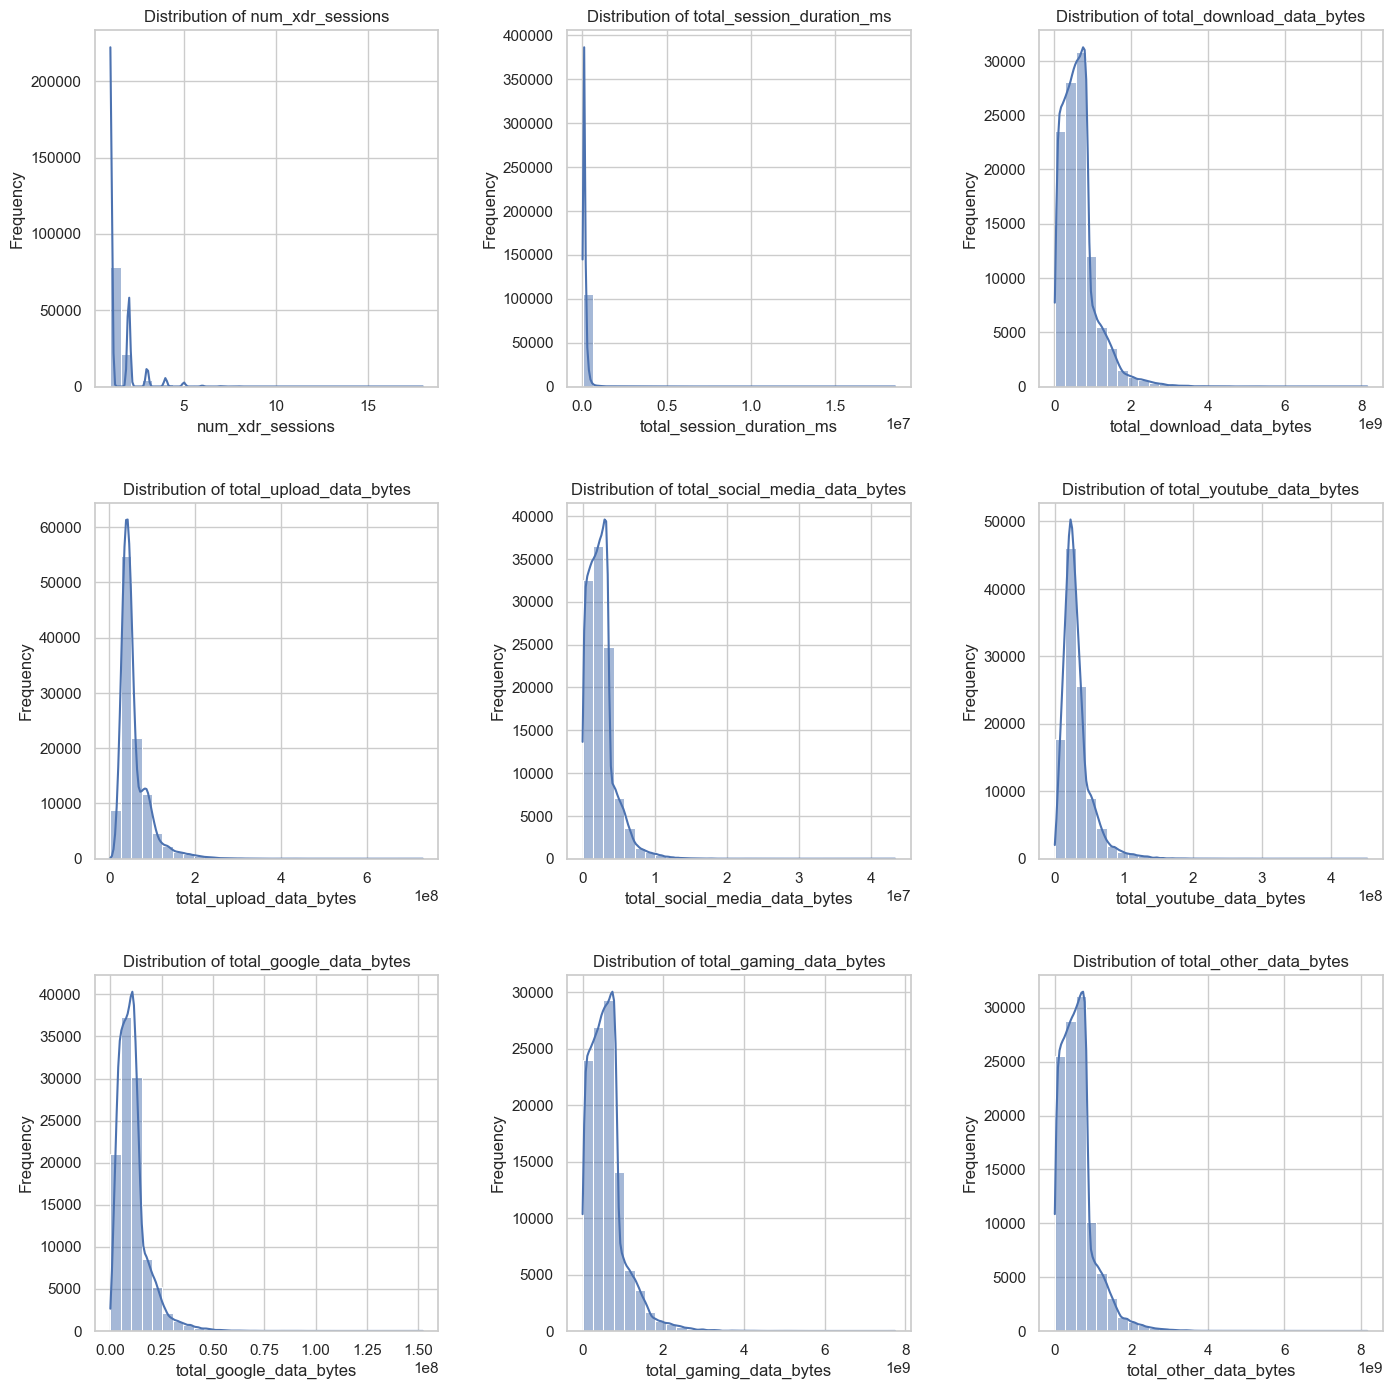

In [20]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  
fig.tight_layout(pad=5.0)

for i, column in enumerate(list(agregate_df.columns)[1:]):
    ax = axes[i // 3, i % 3]
    sns.histplot(agregate_df[column], kde=True, bins=30, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.show()


In [22]:
# Top 10 Handsets Used by Customers
top_10_handsets = df['Handset Type'].value_counts().head(10)
print("Top 10 Handsets used by customers:")
print(top_10_handsets)

# Top 3 Handset Manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print("\nTop 3 Handset Manufacturers:")
print(top_3_manufacturers)

# Top 5 Handsets Per Top 3 Handset Manufacturer
top_5_handsets_per_manufacturer = {}
for manufacturer in top_3_manufacturers.index:
    top_5_handsets = (
        df[df['Handset Manufacturer'] == manufacturer]['Handset Type']
        .value_counts()
        .head(5)
    )
    top_5_handsets_per_manufacturer[manufacturer] = top_5_handsets

print("\nTop 5 Handsets for Each Top Manufacturer:")
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"{manufacturer}:\n{handsets}\n")


Top 10 Handsets used by customers:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

Top 5 Handsets for Each Top Manufacturer:
Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     348